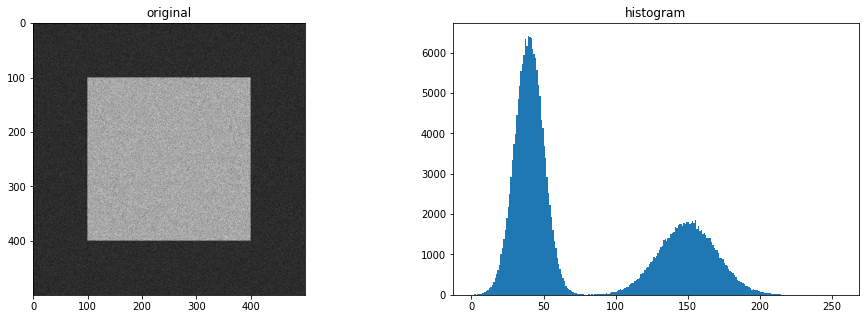

thresh_value =  87


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a sample image
np.random.seed(7)
img = np.random.normal(40,10,size=(500,500)).astype('uint8')
img[img>100]=40
img[100:400,100:400] = np.random.normal(150,20,size=(300,300)).astype('uint8')

plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img, cmap ='gray')

# plot the histogram
plt.subplot(1,2,2)
plt.title("histogram")
hist = plt.hist(img.ravel(), 256, [0,256])

plt.gcf().set_size_inches(16, 5)
plt.show()


def balanced_hist_thresholding(hist):
    # Starting point of histogram
    i_s = np.min(np.where(hist[0]>0))
    # End point of histogram
    i_e = np.max(np.where(hist[0]>0))
    # Center of histogram
    i_m = (i_s + i_e)//2
    # Left side weight
    w_l = np.sum(hist[0][0:i_m+1])
    # Right side weight
    w_r = np.sum(hist[0][i_m+1:i_e+1])
    # Until starting point not equal to endpoint
    while (i_s != i_e):
        # If right side is heavier
        if (w_r > w_l):
            # Remove the end weight
            w_r -= hist[0][i_e]
            i_e -= 1
            # Adjust the center position and recompute the weights
            if ((i_s+i_e)//2) < i_m:
                w_l -= hist[0][i_m]
                w_r += hist[0][i_m]
                i_m -= 1
        else:
            # If left side is heavier, remove the starting weight
            w_l -= hist[0][i_s]
            i_s += 1
            # Adjust the center position and recompute the weights
            if ((i_s+i_e)//2) >= i_m:
                w_l += hist[0][i_m+1]
                w_r -= hist[0][i_m+1]
                i_m += 1
    return i_m

thresh_value = balanced_hist_thresholding(hist)
print("thresh_value = ", thresh_value)